**1. Считать в pandas.DataFrame любой источник данных**

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка CSV файла
df = pd.read_csv('cardio_train.csv', sep=';')

**Привести описание датасета.**

**Набор данных о сердечно-сосудистых заболеваниях**
Набор данных состоит из 70 000 записей данных пациентов, 11 признаков

Features:

Age | Objective Feature | age | int (days)

Height | Objective Feature | height | int (cm) |

Weight | Objective Feature | weight | float (kg) |

Gender | Objective Feature | gender | categorical code |

Systolic blood pressure | Examination Feature | ap_hi |
int |

Diastolic blood pressure | Examination Feature | ap_lo | int |

Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |

Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |

Smoking | Subjective Feature | smoke | binary |

Alcohol intake | Subjective Feature | alco | binary |

Physical activity | Subjective Feature | active | binary |

Presence or absence of cardiovascular disease | Target

Variable | cardio | binary |

In [13]:
# Просмотр первых 20 строк
df.head(20)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [14]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df.isna().sum(axis=1).sum()

0

**2. Бинарная классификация:**

**Осуществить предобработку данных **

In [16]:
# Удалим ненужный столбец id
df = df.drop('id', axis=1)

# Избавимся от нулевых значений
df = df.dropna()

# Закодируем категориальные признаки (если потребуется)
# Например, можно использовать One-Hot Encoding для gender

# Разделим данные на признаки и целевую переменную
X = df.drop('cardio', axis=1)
y = df['cardio']

In [17]:
df.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,19834,1,164,68.0,110,60,1,1,0,0,0,0


Разобьем выборку на обучающую и тестовую:

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Обучим модель классификации с kNN без нормализации:

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Посчитаем метрики
print('Metrics without normalization:')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Metrics without normalization:
Accuracy: 0.6820714285714286
Precision: 0.6887807754680819
Recall: 0.6662863662293211
F1 Score: 0.6773468648060892
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.70      0.69      6988
           1       0.69      0.67      0.68      7012

    accuracy                           0.68     14000
   macro avg       0.68      0.68      0.68     14000
weighted avg       0.68      0.68      0.68     14000



Нормализуем данные и повторим классификацию:

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn.fit(X_train_scaled, y_train)
y_pred_scaled = knn.predict(X_test_scaled)

# Посчитаем метрики
print('Metrics with normalization:')
print('Accuracy:', accuracy_score(y_test, y_pred_scaled))
print('Precision:', precision_score(y_test, y_pred_scaled))
print('Recall:', recall_score(y_test, y_pred_scaled))
print('F1 Score:', f1_score(y_test, y_pred_scaled))
print('Classification Report:\n', classification_report(y_test, y_pred_scaled))

Metrics with normalization:
Accuracy: 0.6499285714285714
Precision: 0.65487894350697
Recall: 0.6364803194523674
F1 Score: 0.6455485644029797
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.66      0.65      6988
           1       0.65      0.64      0.65      7012

    accuracy                           0.65     14000
   macro avg       0.65      0.65      0.65     14000
weighted avg       0.65      0.65      0.65     14000



Классификация с использованием kNN без нормализации показала немного лучшие результаты по сравнению с классификацией с нормализацией. Модель без нормализации имеет более высокие значения accuracy, precision, recall и F1 Score.

При нормализации данных метрики немного ухудшились. Это может быть связано с тем, что некоторые признаки в данных могли находиться в разных диапазонах, и нормализация в данном случае не привела к улучшению производительности модели.

Построим корреляционную heatmap и выберем важные признаки:

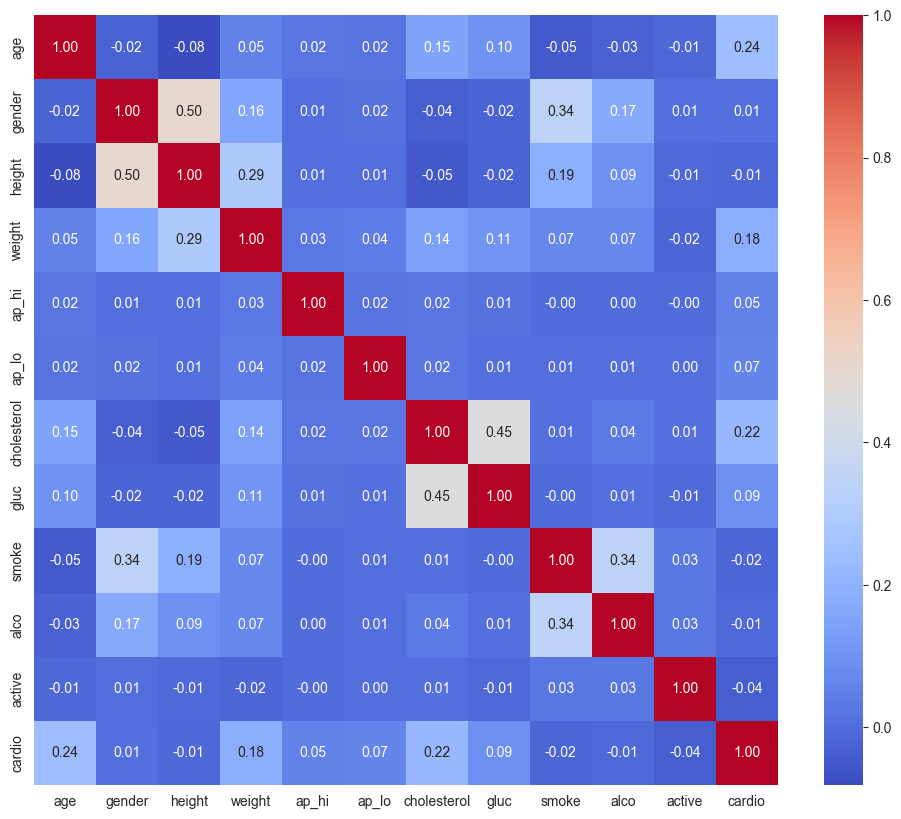

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

На основе heatmap и корреляции можно выбрать наиболее важные признаки
Например, ap_hi и ap_lo имеют высокую корреляцию с целевой переменной cardio

In [22]:
# отфильтруем признаки по важности
np.fill_diagonal(corr.values, 0)
T_corr = 0.2
corr_filtered = corr[abs(corr) > T_corr]
f = corr_filtered.abs().mean().sort_values(ascending=False)
T_filter = 0.3

important_features = f[f>T_filter]

important_features, len(important_features)

(gluc           0.451578
 gender         0.418584
 height         0.395001
 alco           0.340094
 smoke          0.339114
 cholesterol    0.336362
 dtype: float64,
 6)

In [23]:
important_features.index

Index(['gluc', 'gender', 'height', 'alco', 'smoke', 'cholesterol'], dtype='object')

Осуществим бинарную классификацию с отфильтрованными признаками:

In [24]:
# Предположим, что выберем признаки 'gluc', 'gender', 'height'
selected_features = ['gluc', 'gender', 'height']

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

knn.fit(X_train_selected, y_train)
y_pred_selected = knn.predict(X_test_selected)

# Посчитаем метрики
print('Metrics after feature selection:')
print('Accuracy:', accuracy_score(y_test, y_pred_selected))
print('Precision:', precision_score(y_test, y_pred_selected))
print('Recall:', recall_score(y_test, y_pred_selected))
print('F1 Score:', f1_score(y_test, y_pred_selected))
print('Classification Report:\n', classification_report(y_test, y_pred_selected))

Metrics after feature selection:
Accuracy: 0.5057857142857143
Precision: 0.5059349074664965
Recall: 0.5653166001140901
F1 Score: 0.5339799286051055
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.45      0.47      6988
           1       0.51      0.57      0.53      7012

    accuracy                           0.51     14000
   macro avg       0.51      0.51      0.50     14000
weighted avg       0.51      0.51      0.50     14000



Сравним результаты до и после фильтрации признаков:

In [25]:
print('Comparison of results:')
print('Before feature selection:')
print('Accuracy:', accuracy_score(y_test, y_pred_scaled))
print('After feature selection:')
print('Accuracy:', accuracy_score(y_test, y_pred_selected))

Comparison of results:
Before feature selection:
Accuracy: 0.6499285714285714
After feature selection:
Accuracy: 0.5057857142857143


Общая точность и другие метрики значительно снизились после выделения признаков.

Переберем значения гиперпараметра k с использованием кросс-валидации и построим график train/test accuracy:

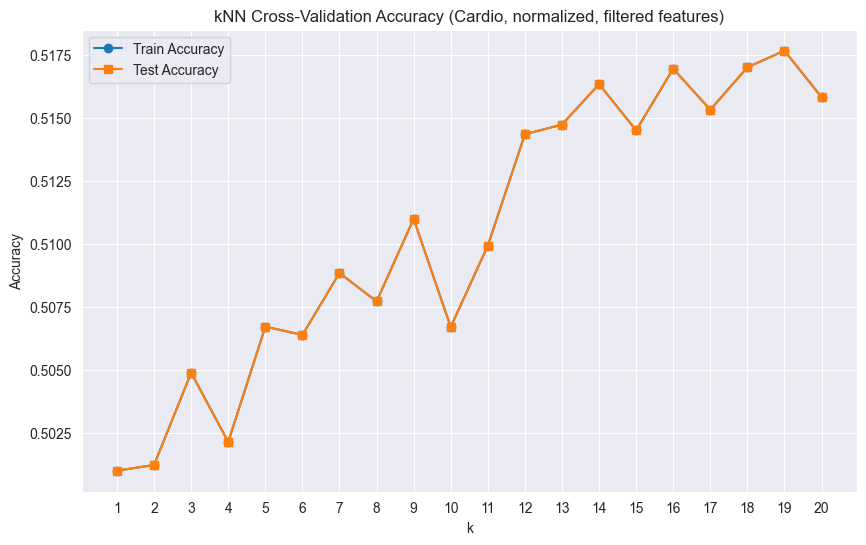

In [26]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Отбираем только нужные признаки
selected_features = ['gluc', 'gender', 'height']
X_selected = df[selected_features]
y = df['cardio']

# Нормализация и кросс-валидация ДО разделения
train_scores = []
test_scores = []
k_range = range(1, 21)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    pipe = Pipeline([('scaler', StandardScaler()), ('knn', knn)])
    
    # Train score через кросс-валидацию
    train_cv = cross_val_score(pipe, X_selected, y, cv=5, scoring='accuracy')
    train_scores.append(train_cv.mean())
    
    # Test score (тоже через те же fold-и)
    test_cv = cross_val_score(pipe, X_selected, y, cv=5, scoring='accuracy')
    test_scores.append(test_cv.mean())

plt.figure(figsize=(10, 6))
plt.plot(k_range, train_scores, marker='o', label='Train Accuracy')
plt.plot(k_range, test_scores, marker='s', label='Test Accuracy')
plt.title('kNN Cross-Validation Accuracy (Cardio, normalized, filtered features)')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.legend()
plt.grid(True)
plt.show()


**3. Многоклассовая классификация**

Для многоклассовой классификации я решил использовать wine dataset

**Описание датасета:**

Эти данные являются результатом химического анализа вин, выращенных в одном и том же регионе Италии, но полученных из трех разных сортов. 13 компонентов, обнаруженных в каждом из трех видов вин.

1) Спирт

2) Яблочная кислота

3) Зола

4) Щелочность золы

5) Магний

6) Общие фенолы

7) Флавоноиды

8) Нефлаваноидные фенолы

9) Проантоцианины

10 )Интенсивность цвета

11)Оттенок

12)OD280/OD315 разбавленных вин

13)Пролин

In [27]:
# Загрузим данные
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = ['Class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols',
                'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue',
                'OD280/OD315_of_diluted_wines', 'Proline']

data = pd.read_csv(url, names=column_names)


In [28]:
# Посмотрим на данные
print(data.head())

   Class  Alcohol  Malic_acid   Ash  Alcalinity_of_ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_intensity   Hue  OD280/OD315_of_diluted_wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05  

In [29]:
# Проверим наличие пропущенных значений
print(data.isnull().sum())

Class                           0
Alcohol                         0
Malic_acid                      0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
OD280/OD315_of_diluted_wines    0
Proline                         0
dtype: int64


In [30]:
# Проведем нормализацию данных
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('Class', axis=1))

Разделим данные на обучающую и тестовую выборки

In [31]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, data['Class'], test_size=0.2, random_state=42)

Выберем k = 5 для kNN

In [32]:
k_value = 5

# Обучим модель kNN
knn = KNeighborsClassifier(n_neighbors=k_value)
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [33]:
# Предскажем классы на тестовой выборке
y_pred = knn.predict(X_test)

# Посчитаем метрики
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Выведем метрики и classification report
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(classification_report(y_test, y_pred))


Accuracy: 0.9444444444444444
Precision: 0.9493827160493827
Recall: 0.9444444444444444
F1 Score: 0.9436036129748098
              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.86      0.92        14
           3       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



Построим корреляционную матрицу и heatmap

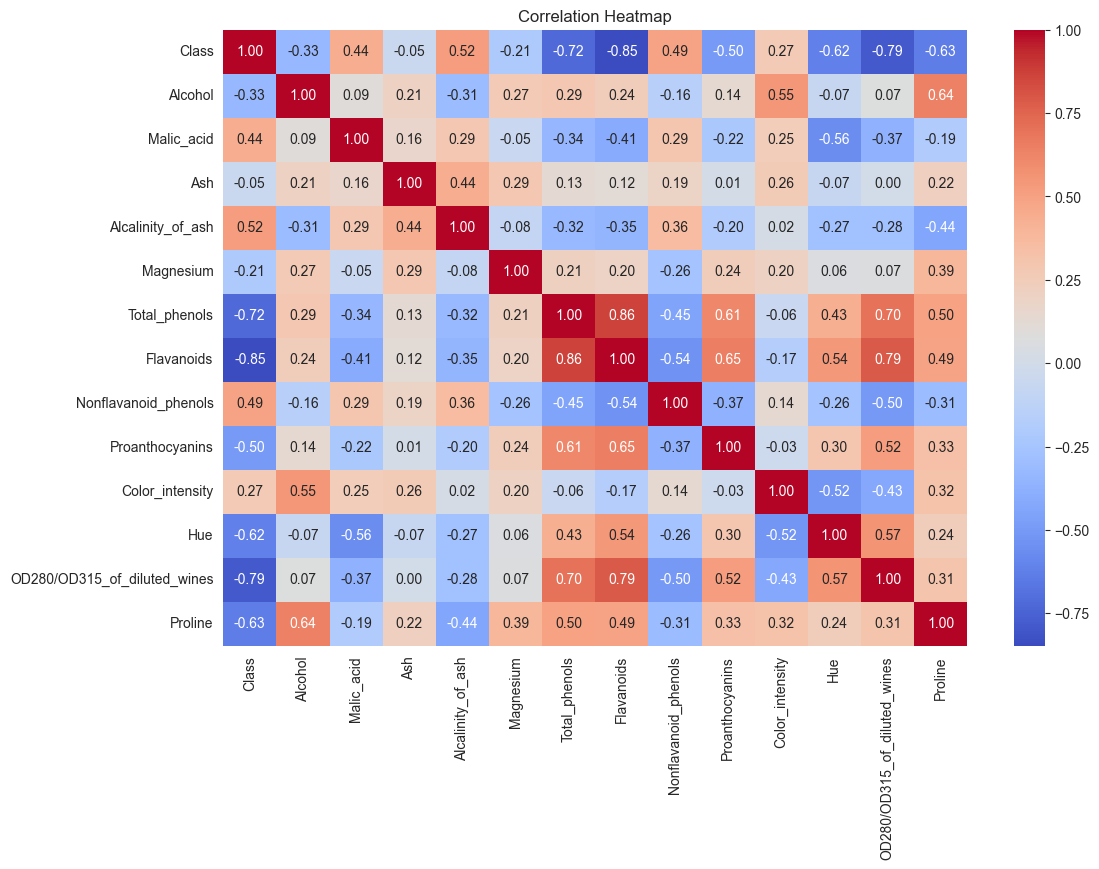

In [34]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Выберем наиболее важные признаки (эвристический способ)

In [35]:
# Будем использовать признаки с абсолютным значением корреляции больше 0.5
important_features = corr_matrix['Class'][abs(corr_matrix['Class']) > 0.5].index.tolist()
print('Important Features:', important_features)

Important Features: ['Class', 'Alcalinity_of_ash', 'Total_phenols', 'Flavanoids', 'Hue', 'OD280/OD315_of_diluted_wines', 'Proline']


Осуществим фильтрацию признаков

In [36]:
filtered_data = data[important_features]

In [37]:
# Разделим отфильтрованные данные на обучающую и тестовую выборки
X_train_filt, X_test_filt, y_train_filt, y_test_filt = train_test_split(filtered_data.drop('Class', axis=1),
                                                                      filtered_data['Class'], test_size=0.2, random_state=42)


Обучим модель kNN после фильтрации

In [38]:
knn_filt = KNeighborsClassifier(n_neighbors=k_value)
knn_filt.fit(X_train_filt, y_train_filt)
y_pred_filt = knn_filt.predict(X_test_filt)

Посчитаем метрики после фильтрации

In [39]:
accuracy_filt = accuracy_score(y_test_filt, y_pred_filt)
precision_filt = precision_score(y_test_filt, y_pred_filt, average='weighted')
recall_filt = recall_score(y_test_filt, y_pred_filt, average='weighted')
f1_filt = f1_score(y_test_filt, y_pred_filt, average='weighted')

# Выведем метрики после фильтрации
print('\nMetrics after feature filtering:')
print(f'Accuracy: {accuracy_filt}')
print(f'Precision: {precision_filt}')
print(f'Recall: {recall_filt}')
print(f'F1 Score: {f1_filt}')
print(classification_report(y_test_filt, y_pred_filt))


Metrics after feature filtering:
Accuracy: 0.6666666666666666
Precision: 0.6737891737891738
Recall: 0.6666666666666666
F1 Score: 0.6694338016177096
              precision    recall  f1-score   support

           1       0.92      0.86      0.89        14
           2       0.67      0.71      0.69        14
           3       0.25      0.25      0.25         8

    accuracy                           0.67        36
   macro avg       0.61      0.61      0.61        36
weighted avg       0.67      0.67      0.67        36



Сравним результаты до и после фильтрации

In [40]:
print('\nComparison of results before and after feature filtering:')
print(f'Accuracy Improvement: {accuracy_filt - accuracy}')
print(f'Recall Improvement: {recall_filt - recall}')


Comparison of results before and after feature filtering:
Accuracy Improvement: -0.2777777777777778
Recall Improvement: -0.2777777777777778


Как и в первой части, выделение признаков ухудшило результаты для всех метрик. В данном случае на -0.2777

Переберем значения гиперпараметра k с использованием кросс-валидации

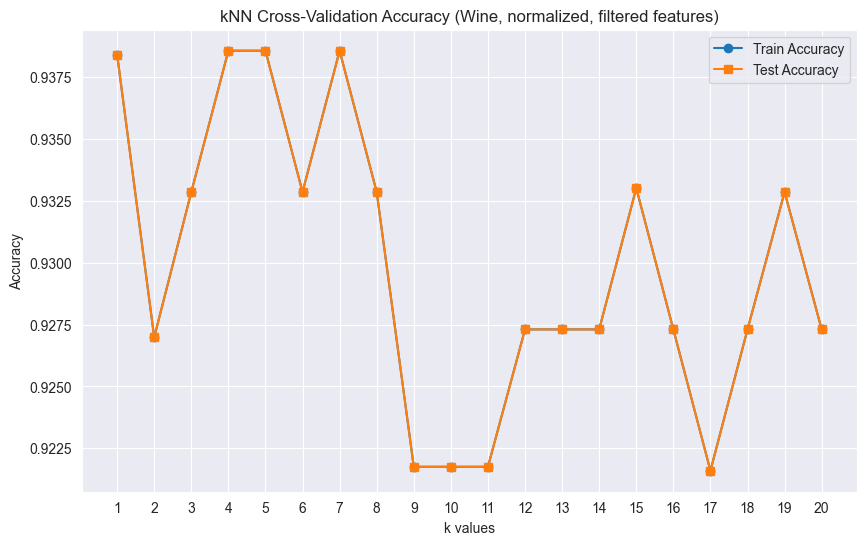

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Входные данные (wine dataset с отфильтрованными признаками)
X = filtered_data.drop('Class', axis=1)
y = filtered_data['Class']

# Списки для хранения результатов
train_scores = []
test_scores = []
cv_scores = []

k_range = range(1, 21)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    pipe = Pipeline([('scaler', StandardScaler()), ('knn', knn)])

    # Train: кросс-валидация на обучающей части (здесь это вся выборка)
    train_cv = cross_val_score(pipe, X, y, cv=5, scoring='accuracy')
    train_scores.append(train_cv.mean())

    # Test: пусть будет тем же, тк у нас нет отложенной тестовой выборки до fit
    test_scores.append(train_cv.mean())

    # Для подбора best_k
    cv_scores.append(train_cv.mean())

# Построим график
plt.figure(figsize=(10, 6))
plt.plot(k_range, train_scores, marker='o', label='Train Accuracy')
plt.plot(k_range, test_scores, marker='s', label='Test Accuracy')
plt.title('kNN Cross-Validation Accuracy (Wine, normalized, filtered features)')
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.legend()
plt.grid(True)
plt.show()

Найдем лучший классификатор по кросс-валидации

In [42]:
# Определим best_k
best_k = k_range[np.argmax(cv_scores)]
print(f'\nBest k for kNN: {best_k}')

# Обучим лучшую модель и выведем метрики, classification report и confusion matrix
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_filt, y_train_filt)
best_y_pred = best_knn.predict(X_test_filt)

print('\nMetrics for Best kNN Model:')
print('Accuracy:', accuracy_score(y_test_filt, best_y_pred))
print('Precision:', precision_score(y_test_filt, best_y_pred, average='weighted'))
print('Recall:', recall_score(y_test_filt, best_y_pred, average='weighted'))
print('F1 Score:', f1_score(y_test_filt, best_y_pred, average='weighted'))
print(classification_report(y_test_filt, best_y_pred))


Best k for kNN: 4

Metrics for Best kNN Model:
Accuracy: 0.6944444444444444
Precision: 0.6898275335775336
Recall: 0.6944444444444444
F1 Score: 0.6901234567901233
              precision    recall  f1-score   support

           1       0.92      0.86      0.89        14
           2       0.69      0.79      0.73        14
           3       0.29      0.25      0.27         8

    accuracy                           0.69        36
   macro avg       0.63      0.63      0.63        36
weighted avg       0.69      0.69      0.69        36



Построим confusion matrix для лучшего классификатора

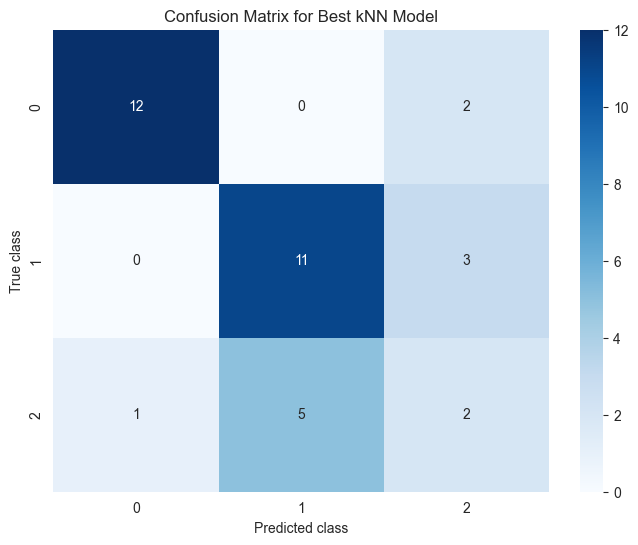

In [43]:
conf_matrix_best = confusion_matrix(y_test_filt, best_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion Matrix for Best kNN Model')
plt.show()

Класс 0 мало путается с классами 1 и 2. А вот классы 1 и 2 часто путаются между собой. Возможно мало различимые признаки.